<a href="https://colab.research.google.com/github/LeonWa24/Dai_AirBnB/blob/main/AirBnB_Berlin_Listings_V1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBnB pricing model

The objective of this mission is to analyze and develop a model to determine the optimal pricing for Airbnb listings, with a specific focus on properties located in the Berlin area. The project involves several key steps. First, it requires collecting data on various Airbnb listings, including factors such as location, amenities, property type, and customer reviews. Next, the project entails performing exploratory data analysis to identify patterns and correlations that affect pricing. After that, the goal is to develop a predictive model using appropriate statistical and machine learning techniques to estimate the ideal price for an Airbnb listing.

The data is made accessible by the Kaggle user "The Devastator" and is available at the following link: [Berlin Airbnb Ratings: How Hosts Measure Up](https://www.kaggle.com/datasets/thedevastator/berlin-airbnb-ratings-how-hosts-measure-up).

Following packages are needed to execute the code in this Notebook.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

This part of the code is for importing the Dataset. The.csv file is accessible via GitHub. If necessary change url.

In [ ]:
BerlinWeekDays = pd.read_csv('https://raw.githubusercontent.com/LeonWa24/Dai_AirBnB/main/AirBnB%20Listings/berlin_weekdays.csv')
BerlinWeekEnd = pd.read_csv('https://raw.githubusercontent.com/LeonWa24/Dai_AirBnB/main/AirBnB%20Listings/berlin_weekends.csv')


BerlinWeekDays.drop(columns = ['Unnamed: 0'],inplace=True)
BerlinWeekEnd.drop(columns = ['Unnamed: 0'],inplace=True)

#print(BerlinWeekDays.head())
#print(BerlinWeekEnd.head())

def combine(Dataframe1,Dataframe2):       # Combine the 2 datasets into a single dataset.
    Dataframe1['Weekday_Weekend'] = 'Weekday'
    Dataframe2['Weekday_Weekend'] = 'Weekend'
    combined = pd.concat([Dataframe1, Dataframe2])
    return combined
berlin = combine(BerlinWeekDays,BerlinWeekEnd)
berlin

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Weekday_Weekend
0,185.799757,Private room,False,True,2.0,True,0,0,10.0,98.0,1,3.582211,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.49150,Weekday
1,194.914462,Private room,False,True,5.0,False,0,1,9.0,86.0,1,3.525410,0.511922,75.339529,11.487002,106.442356,21.947685,13.46800,52.51900,Weekday
2,176.217631,Private room,False,True,2.0,False,0,0,9.0,91.0,1,3.801713,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527,Weekday
3,207.768533,Private room,False,True,3.0,True,0,0,10.0,97.0,1,0.982408,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139,Weekday
4,150.743199,Private room,False,True,2.0,False,0,0,10.0,99.0,1,8.869697,2.187188,39.860151,6.077469,50.996308,10.515090,13.52440,52.47842,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,84.836870,Private room,False,True,2.0,False,0,0,10.0,100.0,1,16.417127,4.070691,23.484663,3.579546,30.663099,6.487380,13.54900,52.40000,Weekend
1196,134.617182,Private room,False,True,4.0,False,1,0,10.0,98.0,1,14.971985,2.620839,25.750931,3.924972,33.433648,7.073544,13.53187,52.40874,Weekend
1197,134.617182,Private room,False,True,4.0,False,1,0,10.0,93.0,1,15.166175,2.754838,25.439079,3.877440,33.027106,6.987532,13.53301,52.40712,Weekend
1198,160.091614,Entire home/apt,False,False,3.0,False,0,0,9.0,86.0,1,22.617458,13.314115,16.600731,2.530293,21.455797,4.539394,13.70702,52.42405,Weekend


## Understanding the data

Explanation of non-self-explanatory variables:

*   realSum = Price per night
*   room_type = Private room or entire home
*   multi = Host got multiple listings (1) or only one listing (0)
* biz = Listing is suitable for business travel (1) or not (0)
* cleanliness_rating = Average coustomer review on scale 1 to 10
* cleanliness_rating = Average coustomer review on scale 1 to 10
*   attr_index_norm = normalized data (1 to 100) of a listings attracktion, as AirBnB calculates it. (Exact input unknown)
*   rest_index_norm =  normalized data (1 to 100) of a listings resting ability (sleep quality etc.), as AirBnB calculates it. (Exact input unknown)

*   lng = longitude of a listing

*   lat = latitude of a listing












In [ ]:
print("Column Inspection\n")
print(berlin.info())

print("\n\nInspection of quantittive variables")
berlin.describe()
#print(berlin.isna().sum())

Column Inspection

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     2484 non-null   float64
 1   room_type                   2484 non-null   object 
 2   room_shared                 2484 non-null   bool   
 3   room_private                2484 non-null   bool   
 4   person_capacity             2484 non-null   float64
 5   host_is_superhost           2484 non-null   bool   
 6   multi                       2484 non-null   int64  
 7   biz                         2484 non-null   int64  
 8   cleanliness_rating          2484 non-null   float64
 9   guest_satisfaction_overall  2484 non-null   float64
 10  bedrooms                    2484 non-null   int64  
 11  dist                        2484 non-null   float64
 12  metro_dist                  2484 non-null   float64
 13  attr_index         

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,244.583752,2.774960,0.276167,0.174718,9.461755,94.323671,1.070451,5.257093,0.836064,110.223416,16.803111,146.875822,30.666967,13.399729,52.509110
std,235.329289,1.188142,0.447191,0.379802,0.849384,6.809406,0.552033,3.692649,1.267283,70.676310,10.774273,79.639119,16.634505,0.071801,0.033257
min,64.971487,2.000000,0.000000,0.000000,4.000000,20.000000,0.000000,0.180926,0.011376,15.152201,2.309508,19.576924,4.141882,13.116320,52.370000
25%,144.900439,2.000000,0.000000,0.000000,9.000000,92.000000,1.000000,2.836557,0.271908,68.380692,10.422633,92.638581,19.378819,13.358110,52.490850
50%,191.175096,2.000000,0.000000,0.000000,10.000000,96.000000,1.000000,4.282886,0.450483,91.128207,13.892056,131.109337,27.410860,13.407420,52.509740
75%,278.349070,3.000000,1.000000,0.000000,10.000000,99.000000,1.000000,6.665746,0.808505,131.311184,20.019760,185.457015,38.818175,13.440238,52.530100
max,5857.483407,6.000000,1.000000,1.000000,10.000000,100.000000,9.000000,25.284557,14.273577,656.079318,100.000000,484.982156,100.000000,13.711850,52.641410



Distribution of columns with data type object or bool.

In [ ]:
# Analyze object type columns
print("Inspection of qualitative variables\n")
for col in berlin.select_dtypes(include=['object']):
    print(berlin[col].value_counts(normalize=True) * 100) # Normalize to get percentages
    print("-" * 30)

# Analyze bool type columns
for col in berlin.select_dtypes(include=['bool']):
    print(berlin[col].value_counts(normalize=True) * 100)
    print("-" * 30)

Inspection of qualitative variables

room_type
Private room       61.553945
Entire home/apt    35.507246
Shared room         2.938808
Name: proportion, dtype: float64
------------------------------
Weekday_Weekend
Weekday    51.690821
Weekend    48.309179
Name: proportion, dtype: float64
------------------------------
room_shared
False    97.061192
True      2.938808
Name: proportion, dtype: float64
------------------------------
room_private
True     61.553945
False    38.446055
Name: proportion, dtype: float64
------------------------------
host_is_superhost
False    74.275362
True     25.724638
Name: proportion, dtype: float64
------------------------------


The Data consist of 20 columns, without missing Data. The column represents things such as Ratings or apartment features that are unique to each listing. There are no missing values in this Dataset, which simplifies the data cleanup. The listings differentiate between it being a weekday or the weekend. Theoretically it would be possible to find doublicate listing by looking at the longitude and latitude columns. "As of right now they are seen as saparate listing with a different feature"

## Analyze the data

First of all we need to figure out what influences the price most. Therefore lets take a look a the general price distribution.

count    2484.000000
mean      244.583752
std       235.329289
min        64.971487
25%       144.900439
50%       191.175096
75%       278.349070
max      5857.483407
Name: realSum, dtype: float64


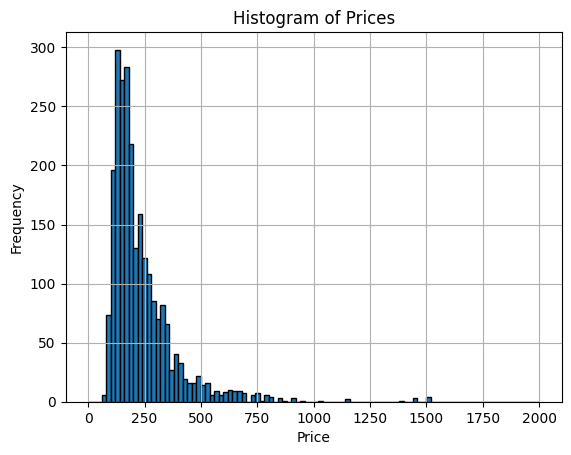

In [ ]:
print(berlin['realSum'].describe())
plt.hist(berlin['realSum'], bins=100, range=(0, 2000), edgecolor='black')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

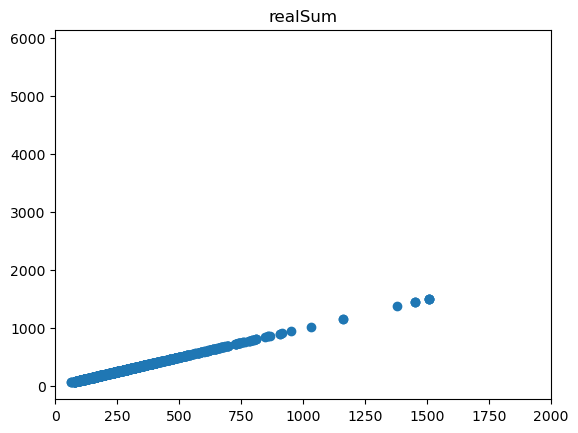

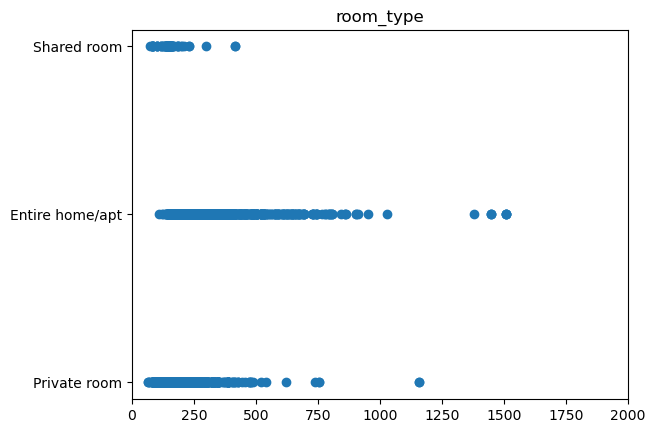

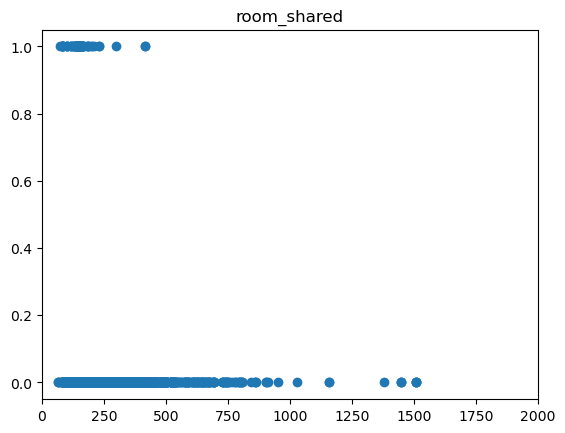

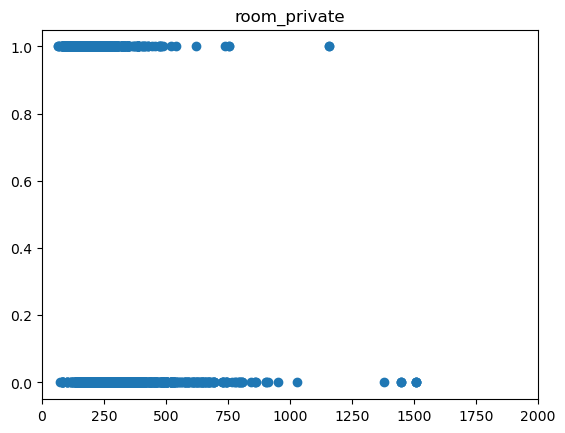

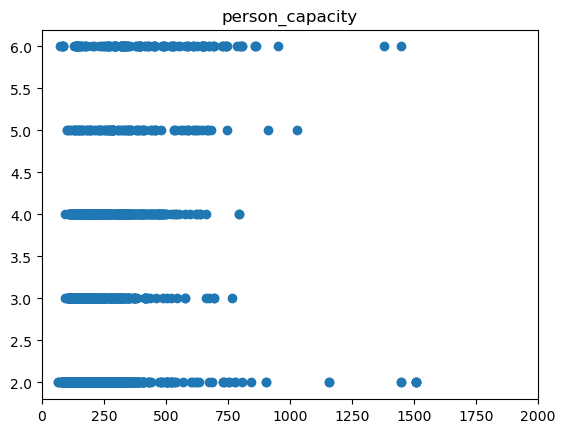

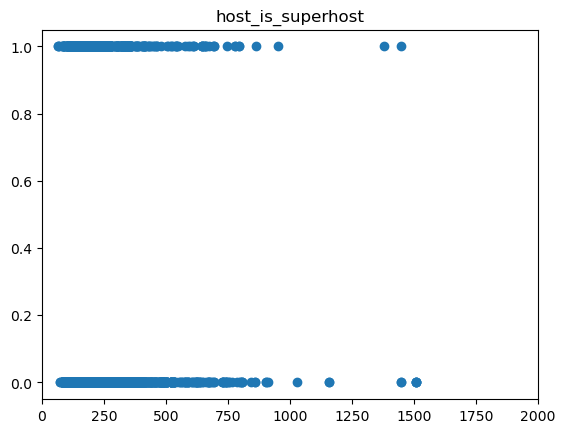

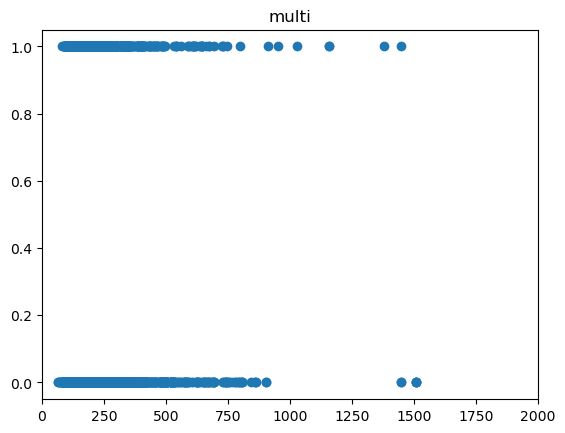

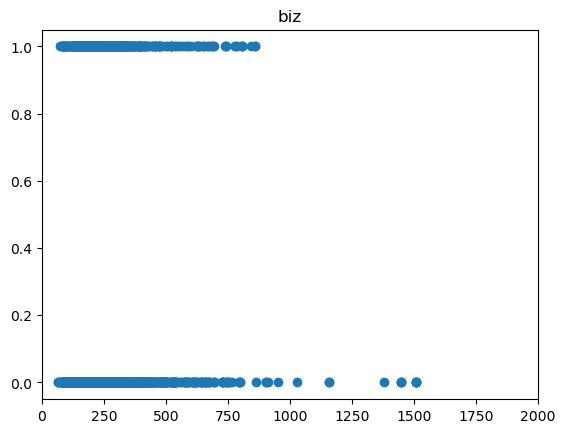

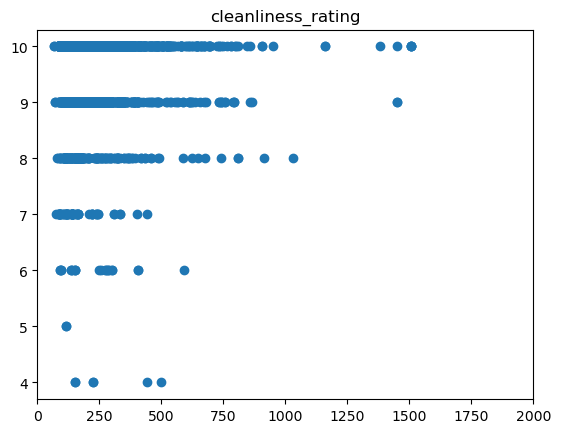

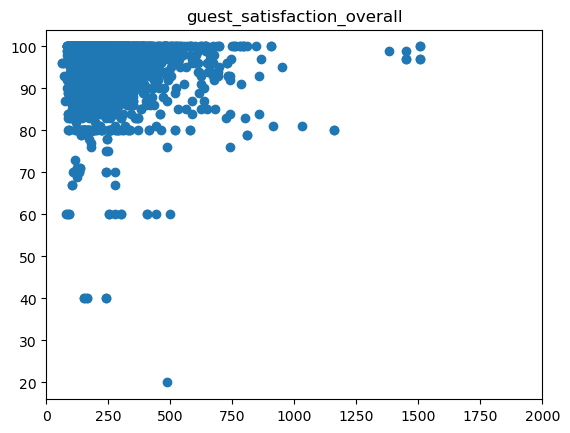

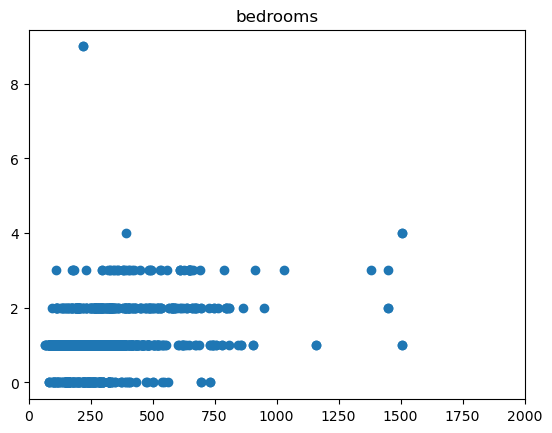

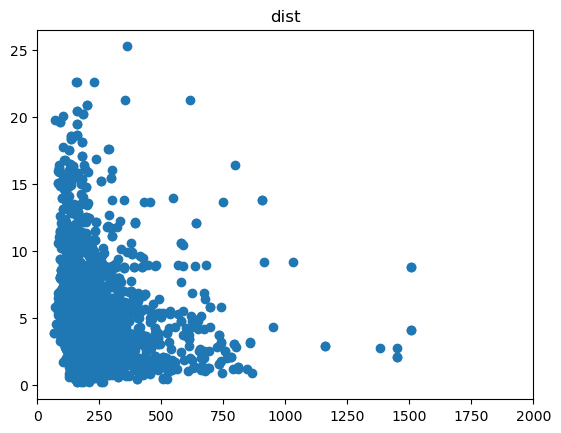

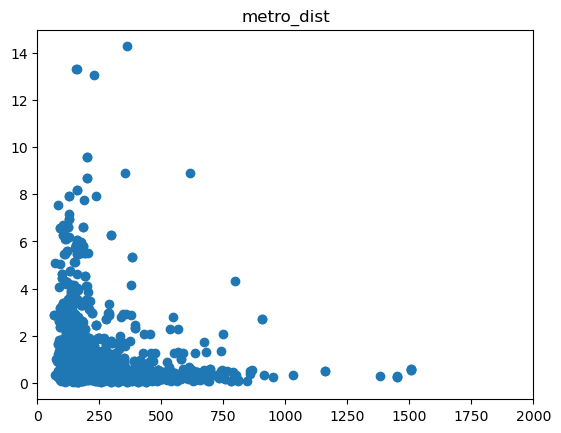

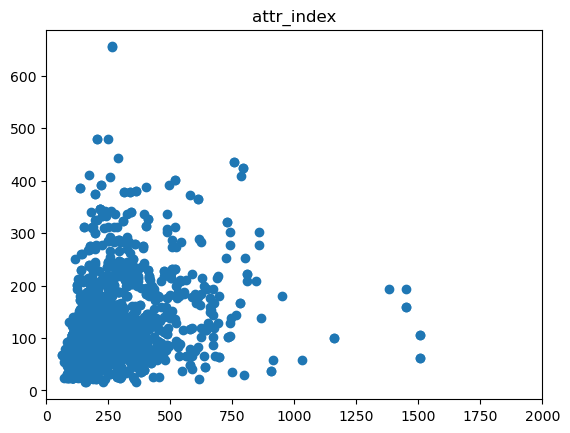

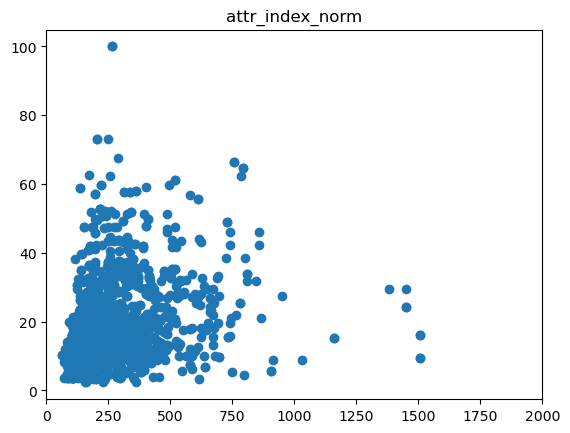

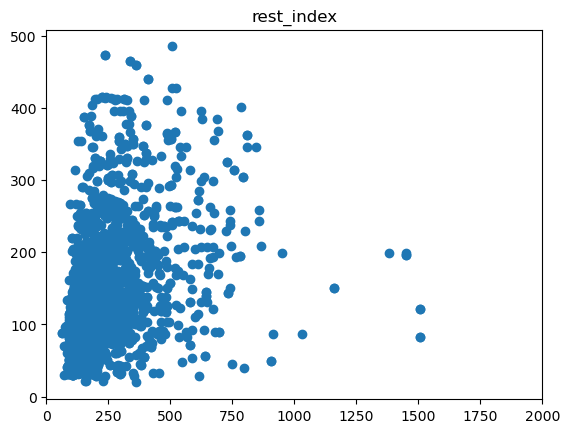

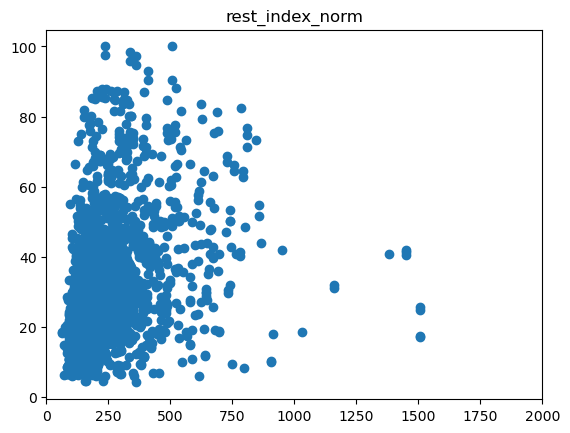

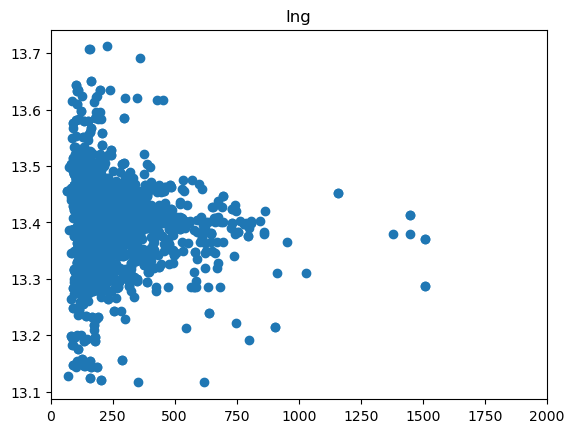

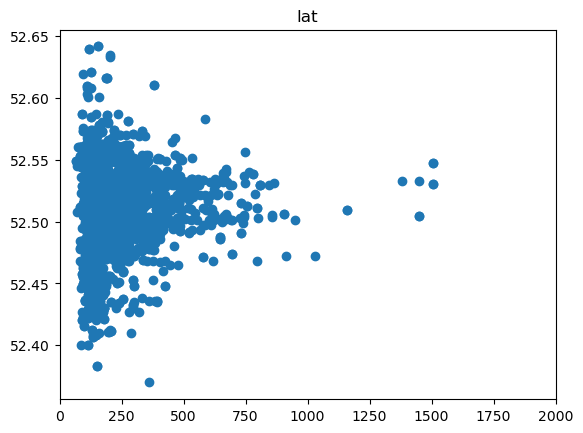

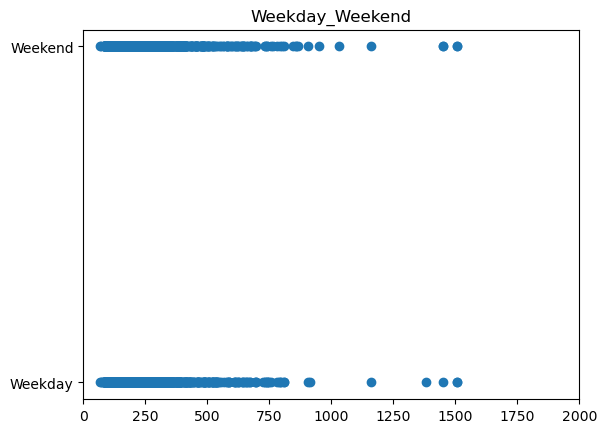

In [ ]:
for col in berlin.columns:
    plt.scatter(berlin['realSum'], berlin[col])
    plt.title(berlin[col].name)
    plt.xlim(0,2000)
    plt.show()
